# Projeto Ames

## Equipe: João Pedro Queiroz e Vitor Raia

## *Ames Dataset*

### Obtendo os dados

In [57]:
from pathlib import Path

DATA_DIR = Path("datasets")
print(DATA_DIR)

datasets


In [58]:
import pandas as pd


def load_housing_data(data_dir: Path) -> pd.DataFrame:
    '''Loads the Ames dataset.

    Loads the Ames dataset from the specified directory.

    Args:
        data_dir: The directory from which the dataset will be loaded.

    Returns:
        A pandas DataFrame containing the California Housing Prices dataset.
    '''
    csv_path = data_dir / 'ames.csv'
    df = pd.read_csv(csv_path)
    return df

In [59]:
data = load_housing_data(DATA_DIR)

print(f'O dataset tem {data.shape[0]} linhas e {data.shape[1]} colunas.')
print('As colunas são:')
for column_name in data.columns:
    print(f'- "{column_name}"')

O dataset tem 2930 linhas e 82 colunas.
As colunas são:
- "Order"
- "PID"
- "MS.SubClass"
- "MS.Zoning"
- "Lot.Frontage"
- "Lot.Area"
- "Street"
- "Alley"
- "Lot.Shape"
- "Land.Contour"
- "Utilities"
- "Lot.Config"
- "Land.Slope"
- "Neighborhood"
- "Condition.1"
- "Condition.2"
- "Bldg.Type"
- "House.Style"
- "Overall.Qual"
- "Overall.Cond"
- "Year.Built"
- "Year.Remod.Add"
- "Roof.Style"
- "Roof.Matl"
- "Exterior.1st"
- "Exterior.2nd"
- "Mas.Vnr.Type"
- "Mas.Vnr.Area"
- "Exter.Qual"
- "Exter.Cond"
- "Foundation"
- "Bsmt.Qual"
- "Bsmt.Cond"
- "Bsmt.Exposure"
- "BsmtFin.Type.1"
- "BsmtFin.SF.1"
- "BsmtFin.Type.2"
- "BsmtFin.SF.2"
- "Bsmt.Unf.SF"
- "Total.Bsmt.SF"
- "Heating"
- "Heating.QC"
- "Central.Air"
- "Electrical"
- "X1st.Flr.SF"
- "X2nd.Flr.SF"
- "Low.Qual.Fin.SF"
- "Gr.Liv.Area"
- "Bsmt.Full.Bath"
- "Bsmt.Half.Bath"
- "Full.Bath"
- "Half.Bath"
- "Bedroom.AbvGr"
- "Kitchen.AbvGr"
- "Kitchen.Qual"
- "TotRms.AbvGrd"
- "Functional"
- "Fireplaces"
- "Fireplace.Qu"
- "Garage.Type"
- "

### Entendimento do negócio

#### O que os dados representam

Estes dados representam um conjunto detalhado de informações sobre **propriedades residenciais (casas) que foram vendidas na cidade de Ames, Iowa, nos Estados Unidos**.

Cada linha do dataset corresponde a uma única casa vendida e as colunas descrevem uma ampla variedade de características sobre essa casa e a transação de venda, incluindo:

* **Características do Lote:** Tamanho, forma, acesso (rua, beco), nivelamento, localização (vizinhança), zoneamento.
* **Características da Construção:** Tipo de moradia, estilo arquitetônico, ano de construção/reforma, materiais.
* **Qualidade e Condição:** Avaliações gerais e específicas (porão, exterior, cozinha, garagem, etc.).
* **Tamanho e Layout Interno:** Áreas (total, andares, porão), número de cômodos, banheiros, quartos.
* **Comodidades:** Aquecimento, ar condicionado, lareiras, garagem, deck, varandas, piscina, cerca.
* **Detalhes da Venda:** Data, tipo e condição da venda.
* **Preço de Venda (`SalePrice`):** O valor final pelo qual a propriedade foi vendida.

Essencialmente, o dataset captura as características de uma casa e o seu valor de mercado no momento da venda, sendo frequentemente utilizado para análise imobiliária e modelos preditivos de preços.

#### Descrição das Colunas

* **`Order`**: Número sequencial/ordem da linha no dataset.
* **`PID`**: (Parcel ID) Identificador único do lote/propriedade.
* **`MS.SubClass`**: Código numérico que identifica o tipo de moradia envolvida na venda (ex: `20` para 1 andar pós-1946, `60` para 2 andares pós-1946).
* **`MS.Zoning`**: Classificação de zoneamento geral da venda (ex: `RL` - Residencial Baixa Densidade, `RM` - Residencial Média Densidade).
* **`Lot.Frontage`**: Comprimento linear (em pés) da rua conectada à propriedade. `NA` indica ausência de dado ou frente não convencional.
* **`Lot.Area`**: Tamanho do lote em pés quadrados.
* **`Street`**: Tipo de acesso rodoviário (ex: `Pave` - Pavimentado, `Grvl` - Cascalho).
* **`Alley`**: Tipo de acesso por beco (ex: `Grvl` - Cascalho, `Pave` - Pavimentado, `NA` - Sem acesso por beco).
* **`Lot.Shape`**: Forma geral da propriedade (ex: `Reg` - Regular, `IR1` - Ligeiramente irregular).
* **`Land.Contour`**: Nivelamento da propriedade (ex: `Lvl` - Nível).
* **`Utilities`**: Tipo de serviços públicos disponíveis (ex: `AllPub` - Todos os serviços públicos).
* **`Lot.Config`**: Configuração do lote (ex: `Inside` - Interno, `Corner` - Esquina, `CulDSac` - Fim de rua sem saída).
* **`Land.Slope`**: Inclinação da propriedade (ex: `Gtl` - Suave).
* **`Neighborhood`**: Localização física dentro dos limites da cidade de Ames.
* **`Condition.1`**: Proximidade a condições externas (ex: `Norm` - Normal, `Artery` - Rua arterial, `Feedr` - Rua alimentadora).
* **`Condition.2`**: Segunda condição de proximidade (se aplicável).
* **`Bldg.Type`**: Tipo de moradia (ex: `1Fam` - Família única, `TwnhsE` - Townhouse final).
* **`House.Style`**: Estilo da moradia (ex: `1Story` - Um andar, `2Story` - Dois andares).
* **`Overall.Qual`**: Qualidade geral do material e acabamento (escala 1-10).
* **`Overall.Cond`**: Condição geral da casa (escala 1-10).
* **`Year.Built`**: Ano de construção original.
* **`Year.Remod.Add`**: Ano da reforma (igual a `Year.Built` se não houve reforma).
* **`Roof.Style`**: Tipo de telhado (ex: `Gable` - Duas águas, `Hip` - Quatro águas).
* **`Roof.Matl`**: Material do telhado (ex: `CompShg` - Telhas de asfalto).
* **`Exterior.1st`**: Revestimento exterior primário.
* **`Exterior.2nd`**: Revestimento exterior secundário (se houver).
* **`Mas.Vnr.Type`**: Tipo de revestimento de alvenaria (ex: `BrkFace` - Tijolo Aparente, `None` - Nenhum).
* **`Mas.Vnr.Area`**: Área de revestimento de alvenaria em pés quadrados.
* **`Exter.Qual`**: Qualidade do material exterior (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`).
* **`Exter.Cond`**: Condição do material exterior (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`).
* **`Foundation`**: Tipo de fundação (ex: `PConc` - Concreto, `CBlock` - Bloco de cimento).
* **`Bsmt.Qual`**: Altura do porão (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`, `NA` - Sem porão).
* **`Bsmt.Cond`**: Condição geral do porão (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`, `NA` - Sem porão).
* **`Bsmt.Exposure`**: Exposição das paredes do porão (walk-out/nível jardim) (ex: `Gd`, `Av`, `Mn`, `No`, `NA` - Sem porão).
* **`BsmtFin.Type.1`**: Qualidade da área acabada principal do porão (ex: `GLQ`, `ALQ`, `BLQ`, `Rec`, `LwQ`, `Unf`, `NA` - Sem porão).
* **`BsmtFin.SF.1`**: Pés quadrados da área acabada tipo 1.
* **`BsmtFin.Type.2`**: Qualidade da segunda área acabada (se houver) (mesmos valores de `BsmtFin.Type.1`).
* **`BsmtFin.SF.2`**: Pés quadrados da área acabada tipo 2.
* **`Bsmt.Unf.SF`**: Pés quadrados de área inacabada do porão.
* **`Total.Bsmt.SF`**: Área total do porão em pés quadrados.
* **`Heating`**: Tipo de aquecimento (ex: `GasA` - Ar quente a gás).
* **`Heating.QC`**: Qualidade e condição do aquecimento (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`).
* **`Central.Air`**: Ar condicionado central (`Y` - Sim, `N` - Não).
* **`Electrical`**: Sistema elétrico (ex: `SBrkr` - Disjuntores).
* **`X1st.Flr.SF`**: Área do primeiro andar em pés quadrados.
* **`X2nd.Flr.SF`**: Área do segundo andar em pés quadrados.
* **`Low.Qual.Fin.SF`**: Pés quadrados acabados de baixa qualidade (todos os andares).
* **`Gr.Liv.Area`**: Área de estar acima do nível do solo em pés quadrados.
* **`Bsmt.Full.Bath`**: Banheiros completos no porão.
* **`Bsmt.Half.Bath`**: Lavabos (meio-banheiros) no porão.
* **`Full.Bath`**: Banheiros completos acima do nível do solo.
* **`Half.Bath`**: Lavabos (meio-banheiros) acima do nível do solo.
* **`Bedroom.AbvGr`**: Número de quartos acima do nível do solo.
* **`Kitchen.AbvGr`**: Número de cozinhas acima do nível do solo.
* **`Kitchen.Qual`**: Qualidade da cozinha (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`).
* **`TotRms.AbvGrd`**: Total de cômodos acima do nível do solo (não inclui banheiros).
* **`Functional`**: Classificação da funcionalidade da casa (ex: `Typ` - Típico).
* **`Fireplaces`**: Número de lareiras.
* **`Fireplace.Qu`**: Qualidade da lareira (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`, `NA` - Sem lareira).
* **`Garage.Type`**: Localização da garagem (ex: `Attchd` - Anexada, `Detchd` - Separada, `NA` - Sem garagem).
* **`Garage.Yr.Blt`**: Ano de construção da garagem (`NA` se não houver garagem).
* **`Garage.Finish`**: Acabamento interior da garagem (ex: `Fin` - Acabada, `RFn` - Rústica, `Unf` - Inacabada, `NA` - Sem garagem).
* **`Garage.Cars`**: Capacidade da garagem em número de carros.
* **`Garage.Area`**: Área da garagem em pés quadrados.
* **`Garage.Qual`**: Qualidade da garagem (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`, `NA` - Sem garagem).
* **`Garage.Cond`**: Condição da garagem (ex: `Ex`, `Gd`, `TA`, `Fa`, `Po`, `NA` - Sem garagem).
* **`Paved.Drive`**: Entrada de automóveis pavimentada (`Y` - Sim, `P` - Parcialmente, `N` - Não).
* **`Wood.Deck.SF`**: Área do deck de madeira em pés quadrados.
* **`Open.Porch.SF`**: Área da varanda aberta em pés quadrados.
* **`Enclosed.Porch`**: Área da varanda fechada em pés quadrados.
* **`X3Ssn.Porch`**: Área da varanda de três estações em pés quadrados.
* **`Screen.Porch`**: Área da varanda com tela em pés quadrados.
* **`Pool.Area`**: Área da piscina em pés quadrados (`0` indica sem piscina).
* **`Pool.QC`**: Qualidade da piscina (ex: `Ex`, `Gd`, `TA`, `Fa`, `NA` - Sem piscina).
* **`Fence`**: Qualidade da cerca (ex: `GdPrv`, `MnPrv`, `GdWo`, `MnWw`, `NA` - Sem cerca).
* **`Misc.Feature`**: Recurso miscelâneo não coberto (ex: `Shed` - Galpão, `Gar2` - Segunda garagem, `NA` - Nenhum).
* **`Misc.Val`**: Valor ($) do recurso miscelâneo.
* **`Mo.Sold`**: Mês da venda (1-12).
* **`Yr.Sold`**: Ano da venda.
* **`Sale.Type`**: Tipo de venda (ex: `WD` - Normal, `New` - Casa Nova).
* **`Sale.Condition`**: Condição da venda (ex: `Normal`, `Partial` - Venda parcial/casa nova, `Abnorml` - Anormal).
* **`SalePrice`**: Preço de venda da propriedade em dólares (variável alvo comum).

### Seleção de 15 Features para Prever log10(SalePrice)

Com base na análise do dataset Ames Housing e considerando o objetivo de prever `log10(SalePrice)` com 15 features (sendo pelo menos 4 categóricas), a seguinte seleção é recomendada por incluir variáveis comumente associadas a um alto poder preditivo:

#### Features Selecionadas (15)

---

**Numéricas/Ordinais (9):**

1.  **`Overall.Qual`**: Qualidade geral do material e acabamento. (Ordinal, mas geralmente tratada como numérica devido à forte correlação).
2.  **`Gr.Liv.Area`**: Área de estar acima do nível do solo (pés quadrados).
3.  **`Total.Bsmt.SF`**: Área total do porão (pés quadrados).
4.  **`Garage.Cars`**: Capacidade da garagem em número de carros.
5.  **`Year.Built`**: Ano de construção original.
6.  **`Year.Remod.Add`**: Ano da reforma (ou construção, se não reformada).
7.  **`Full.Bath`**: Número de banheiros completos acima do solo.
8.  **`TotRms.AbvGrd`**: Número total de cômodos acima do solo (excluindo banheiros).
9.  **`Fireplaces`**: Número de lareiras.

**Categóricas (6 selecionadas, atendendo ao requisito >= 4):**

10. **`Neighborhood`**: Localização física/vizinhança na cidade. **(Categórica)**
11. **`Kitchen.Qual`**: Qualidade da cozinha. **(Categórica Ordinal)**
12. **`Bsmt.Qual`**: Qualidade (altura/acabamento) do porão. **(Categórica Ordinal)**
13. **`Exter.Qual`**: Qualidade do material externo. **(Categórica Ordinal)**
14. **`Heating.QC`**: Qualidade e condição do sistema de aquecimento. **(Categórica Ordinal)**
15. **`Foundation`**: Tipo de fundação (ex: `PConc`). **(Categórica)**

---

#### Justificativa

* Este conjunto abrange dimensões cruciais para a precificação de imóveis:
    * **Qualidade Geral:** `Overall.Qual`
    * **Tamanho:** `Gr.Liv.Area`, `Total.Bsmt.SF`, `Garage.Cars`, `TotRms.AbvGrd`
    * **Idade/Renovação:** `Year.Built`, `Year.Remod.Add`
    * **Localização:** `Neighborhood`
    * **Qualidade de Componentes:** `Kitchen.Qual`, `Bsmt.Qual`, `Exter.Qual`, `Heating.QC`
    * **Comodidades:** `Full.Bath`, `Fireplaces`
    * **Estrutura:** `Foundation`
* As 6 features categóricas selecionadas são conhecidas por terem forte influência no valor dos imóveis neste dataset.
* Atende aos requisitos: 15 features no total, com 6 sendo categóricas (mais que as 4 mínimas exigidas).

---

#### Observações Importantes

* A seleção ótima pode variar conforme a metodologia específica (análise de correlação, feature importance de modelos como Florestas Aleatórias ou Gradient Boosting, Eliminação Recursiva de Features - RFE, etc.) e o algoritmo de machine learning escolhido.
* Features ordinais (`Overall.Qual`, `Kitchen.Qual`, etc.) podem ser tratadas como numéricas (1, 2, 3...) ou categóricas (ex: One-Hot Encoding), exigindo diferentes pré-processamentos. A escolha pode depender do modelo.
* É fundamental realizar o tratamento adequado de dados faltantes (`NA`) antes da modelagem (ex: imputação).
* As features categóricas nominais (como `Neighborhood`, `Foundation`) precisarão ser codificadas (ex: One-Hot Encoding) para a maioria dos modelos. As ordinais podem usar codificação ordinal ou também one-hot.

In [60]:
import pandas as pd
from pathlib import Path

def load_selected_features(data_dir: Path) -> pd.DataFrame:
    '''Loads a subset of the Ames housing dataset with selected features.

    Args:
        data_dir: The directory from which the dataset will be loaded.

    Returns:
        A pandas DataFrame containing only the selected features.
    '''
    # Carrega o dataset completo
    df = load_housing_data(data_dir)
    
    # Define as colunas desejadas
    selected_columns = [
        "Overall.Qual",
        "Gr.Liv.Area",
        "Total.Bsmt.SF",
        "Garage.Cars",
        "Year.Built",
        "Year.Remod.Add",
        "Full.Bath",
        "TotRms.AbvGrd",
        "Fireplaces",
        "Neighborhood",
        "Kitchen.Qual",
        "Bsmt.Qual",
        "Exter.Qual",
        "Heating.QC",
        "Foundation",
        "SalePrice"
    ]
    
    # Retorna apenas as colunas selecionadas
    return df[selected_columns]

In [61]:
data = load_selected_features(DATA_DIR)

## Análise exploratória

#### Análise global

Conferindo os tipos de dados espiando as primeiras linhas do *dataset*:

In [62]:
data.head(n=5)

,Overall.Qual,Gr.Liv.Area,Total.Bsmt.SF,Garage.Cars,Year.Built,Year.Remod.Add,Full.Bath,TotRms.AbvGrd,Fireplaces,Neighborhood,Kitchen.Qual,Bsmt.Qual,Exter.Qual,Heating.QC,Foundation,SalePrice
0,6,1656,1080.0,2.0,1960,1960,1,7,2,NAmes,TA,TA,TA,Fa,CBlock,215000
1,5,896,882.0,1.0,1961,1961,1,5,0,NAmes,TA,TA,TA,TA,CBlock,105000
2,6,1329,1329.0,1.0,1958,1958,1,6,0,NAmes,Gd,TA,TA,TA,CBlock,172000
3,7,2110,2110.0,2.0,1968,1968,2,8,2,NAmes,Ex,TA,Gd,Ex,CBlock,244000
4,5,1629,928.0,2.0,1997,1998,2,6,1,Gilbert,TA,Gd,TA,Gd,PConc,189900


Verificando quantos exemplos temos, e qual o tipo de dados identificado pelo Pandas para cada coluna:

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall.Qual    2930 non-null   int64  
 1   Gr.Liv.Area     2930 non-null   int64  
 2   Total.Bsmt.SF   2929 non-null   float64
 3   Garage.Cars     2929 non-null   float64
 4   Year.Built      2930 non-null   int64  
 5   Year.Remod.Add  2930 non-null   int64  
 6   Full.Bath       2930 non-null   int64  
 7   TotRms.AbvGrd   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Neighborhood    2930 non-null   object 
 10  Kitchen.Qual    2930 non-null   object 
 11  Bsmt.Qual       2850 non-null   object 
 12  Exter.Qual      2930 non-null   object 
 13  Heating.QC      2930 non-null   object 
 14  Foundation      2930 non-null   object 
 15  SalePrice       2930 non-null   int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 366.4+ KB


Aqui nós garantimos que no dataset com as features selecionadas está com 9 features numéricas e 6 categóricas.

In [64]:
data_no_dups = data.drop_duplicates()

In [65]:
data_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 0 to 2929
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall.Qual    2923 non-null   int64  
 1   Gr.Liv.Area     2923 non-null   int64  
 2   Total.Bsmt.SF   2922 non-null   float64
 3   Garage.Cars     2922 non-null   float64
 4   Year.Built      2923 non-null   int64  
 5   Year.Remod.Add  2923 non-null   int64  
 6   Full.Bath       2923 non-null   int64  
 7   TotRms.AbvGrd   2923 non-null   int64  
 8   Fireplaces      2923 non-null   int64  
 9   Neighborhood    2923 non-null   object 
 10  Kitchen.Qual    2923 non-null   object 
 11  Bsmt.Qual       2844 non-null   object 
 12  Exter.Qual      2923 non-null   object 
 13  Heating.QC      2923 non-null   object 
 14  Foundation      2923 non-null   object 
 15  SalePrice       2923 non-null   int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 388.2+ KB


O *dataset* sem linhas duplicadas tem tamanho diferente do *dataset* original, indicando que existiam linhas duplicadas.

## Análise preliminar das features

Vamos verificar as medidas descritivas de cada feature, a começar pelas variáveis numéricas:

In [66]:
data.select_dtypes(include='number').describe()

,Overall.Qual,Gr.Liv.Area,Total.Bsmt.SF,Garage.Cars,Year.Built,Year.Remod.Add,Full.Bath,TotRms.AbvGrd,Fireplaces,SalePrice
count,2930.000000,2930.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,6.094881,1499.690444,1051.614544,1.766815,1971.356314,1984.266553,1.566553,6.443003,0.599317,180796.060068
std,1.411026,505.508887,440.615067,0.760566,30.245361,20.860286,0.552941,1.572964,0.647921,79886.692357
min,1.000000,334.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,2.000000,0.000000,12789.000000
25%,5.000000,1126.000000,793.000000,1.000000,1954.000000,1965.000000,1.000000,5.000000,0.000000,129500.000000
50%,6.000000,1442.000000,990.000000,2.000000,1973.000000,1993.000000,2.000000,6.000000,1.000000,160000.000000
75%,7.000000,1742.750000,1302.000000,2.000000,2001.000000,2004.000000,2.000000,7.000000,1.000000,213500.000000
max,10.000000,5642.000000,6110.000000,5.000000,2010.000000,2010.000000,4.000000,15.000000,4.000000,755000.000000


Como a tabela ficou longa horizontalmente e curta verticalmente, vamos "transpor" para melhor visualização dos dados.

In [67]:
data.select_dtypes(include='number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Overall.Qual,2930.0,6.094881,1.411026,1.0,5.0,6.0,7.00,10.0
Gr.Liv.Area,2930.0,1499.690444,505.508887,334.0,1126.0,1442.0,1742.75,5642.0
Total.Bsmt.SF,2929.0,1051.614544,440.615067,0.0,793.0,990.0,1302.00,6110.0
Garage.Cars,2929.0,1.766815,0.760566,0.0,1.0,2.0,2.00,5.0
Year.Built,2930.0,1971.356314,30.245361,1872.0,1954.0,1973.0,2001.00,2010.0
Year.Remod.Add,2930.0,1984.266553,20.860286,1950.0,1965.0,1993.0,2004.00,2010.0
Full.Bath,2930.0,1.566553,0.552941,0.0,1.0,2.0,2.00,4.0
TotRms.AbvGrd,2930.0,6.443003,1.572964,2.0,5.0,6.0,7.00,15.0
Fireplaces,2930.0,0.599317,0.647921,0.0,0.0,1.0,1.00,4.0
SalePrice,2930.0,180796.060068,79886.692357,12789.0,129500.0,160000.0,213500.00,755000.0


Agora vamos limitar o número da casas decimais para 2 para melhorar ainda mais a visualização.

In [68]:
data.select_dtypes(include='number').describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Overall.Qual,2930.0,6.09,1.41,1.0,5.0,6.0,7.00,10.0
Gr.Liv.Area,2930.0,1499.69,505.51,334.0,1126.0,1442.0,1742.75,5642.0
Total.Bsmt.SF,2929.0,1051.61,440.62,0.0,793.0,990.0,1302.00,6110.0
Garage.Cars,2929.0,1.77,0.76,0.0,1.0,2.0,2.00,5.0
Year.Built,2930.0,1971.36,30.25,1872.0,1954.0,1973.0,2001.00,2010.0
Year.Remod.Add,2930.0,1984.27,20.86,1950.0,1965.0,1993.0,2004.00,2010.0
Full.Bath,2930.0,1.57,0.55,0.0,1.0,2.0,2.00,4.0
TotRms.AbvGrd,2930.0,6.44,1.57,2.0,5.0,6.0,7.00,15.0
Fireplaces,2930.0,0.60,0.65,0.0,0.0,1.0,1.00,4.0
SalePrice,2930.0,180796.06,79886.69,12789.0,129500.0,160000.0,213500.00,755000.0


Observamos o seguinte:

- Todas as colunas possuem $2930$ itens não-nulos ("count"), exceto pelas colunas `Total.Bsmt.SF` e `Garage.Cars` que tem apenas um valor faltante.

- As features são todas estritamente positivas, tem valor mínimo teórico de zero, e tem uma variabilidade muito baixa, exceto a feature `Fireplaces` que possui alta variabilidade! Podemos analisar a magnitude da variabilidade de cada feature em relação à sua própria média, obtendo desta forma um valor normalizado de variação chamado *coeficiente de variação*.

In [69]:
def compute_coefficient_of_variation(data: pd.DataFrame) -> pd.Series:
    '''Computes the coefficient of variation for each column in a DataFrame.

    Args:
        data: A pandas DataFrame.

    Returns:
        A pandas Series containing the coefficient of variation for each column
        in the input DataFrame.
    '''
    stats = data \
        .select_dtypes(include='number') \
        .describe() \
        .transpose()
    CV = stats['std'] / stats['mean']
    CV.rename('Coefficient of Variation', inplace=True)
    return CV


print(compute_coefficient_of_variation(data).round(2).to_markdown())

|                |   Coefficient of Variation |
|:---------------|---------------------------:|
| Overall.Qual   |                       0.23 |
| Gr.Liv.Area    |                       0.34 |
| Total.Bsmt.SF  |                       0.42 |
| Garage.Cars    |                       0.43 |
| Year.Built     |                       0.02 |
| Year.Remod.Add |                       0.01 |
| Full.Bath      |                       0.35 |
| TotRms.AbvGrd  |                       0.24 |
| Fireplaces     |                       1.08 |
| SalePrice      |                       0.44 |


| Feature        |   Coefficient of Variation |
|:---------------|---------------------------:|
| Overall.Qual   |                       0.23 |
| Gr.Liv.Area    |                       0.34 |
| Total.Bsmt.SF  |                       0.42 |
| Garage.Cars    |                       0.43 |
| Year.Built     |                       0.02 |
| Year.Remod.Add |                       0.01 |
| Full.Bath      |                       0.35 |
| TotRms.AbvGrd  |                       0.24 |
| Fireplaces     |                       1.08 |
| SalePrice      |                       0.44 |

Podemos observar que as medidas de desvio padrão, quando normalizadas pelo valor da média (ou seja, o coeficiente de variação), são valores entre $2\%$ e $44\%$, exceto por `Fireplaces`, indicando que existe pouca diferença entre os imóveis de Ames nesses atributos. 

Essa modificação pode afetar a modelagem dos dados, sendo de suma importância para a análise.

Vamos então estudar a distribuição de cada variável com histogramas:

In [70]:
import numpy as np

# Regra prática: número de bins = sqrt(número de amostras)
n_bins = np.floor(np.sqrt(data.shape[0])).astype(int).item()

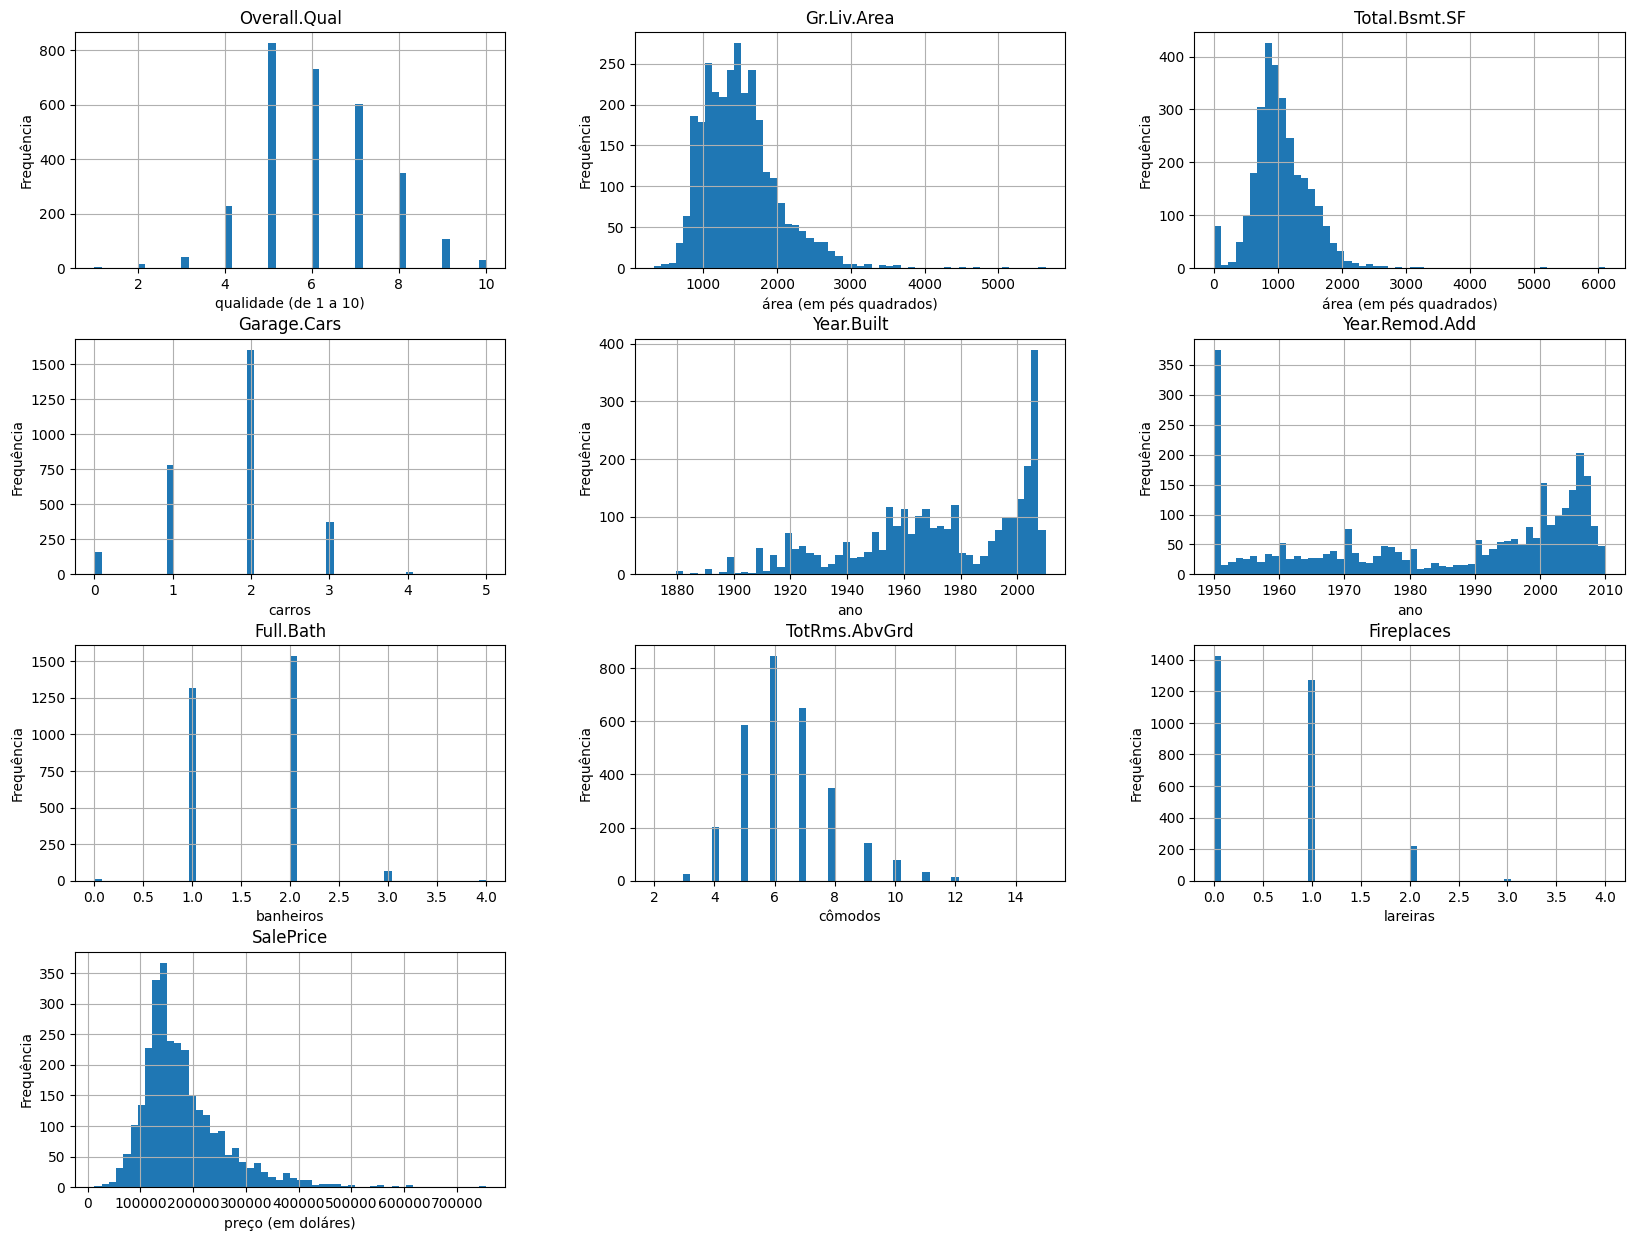

In [71]:
import matplotlib.pyplot as plt

measurement_units = {
    'Overall.Qual': 'qualidade (de 1 a 10)',
    'Gr.Liv.Area': 'área (em pés quadrados)',
    'Total.Bsmt.SF': 'área (em pés quadrados)',
    'Garage.Cars': 'carros',
    'Year.Built': 'ano',
    'Year.Remod.Add': 'ano',
    'Full.Bath': 'banheiros',
    'TotRms.AbvGrd': "cômodos" ,
    'Fireplaces': 'lareiras',
    'SalePrice': 'preço (em doláres)',
}

result = data \
    .select_dtypes(include='number') \
    .hist(bins=n_bins, figsize=(20, 15))

for subplot in result.flatten():
    column = subplot.get_title()
    if not column:
        continue
    unit = measurement_units[column]
    subplot.set_xlabel(unit)
    subplot.set_ylabel('Frequência')

plt.show()

Observamos o seguinte:

##### Casos raros

***Overall.Qual***

Casos raros presentes nas qualidades 1, 2, 3 e 10

***Garage.Cars***

Casos raros ocorrem em garagens com nenhum carro (0 carros) e acima de três carros (4 ou mais carros)

***Full.Bath***

Casos raros ocorrem em imóveis com nenhum banheiro (0 banheiros) e acima de dois banheiros (3 ou mais banheiros)

***TotRms.AbvGrd***

Casos raros ocorrem em imóveis com menos de quatro cômodos (3 ou menos cômodos) e acima de oito cômodos (9 ou mais cômodos)

***Fireplaces***

Casos raros ocorrem em imóveis com mais de 1 lareira (2 ou mais lareiras)

##### Spikes

As colunas `Total.Bsmt.SF` , `Year.Remod.Add` e `Year.Built` possivelmente possuem **spikes** em seus histogramas: barras finas e proeminentes no gráfico. Isso indica um excesso de elementos no *dataset* que apresentam o valor do *spike*, e requer investigação quanto á suas causas. Precisamos analisar a fim de confirmar essa hipótese.

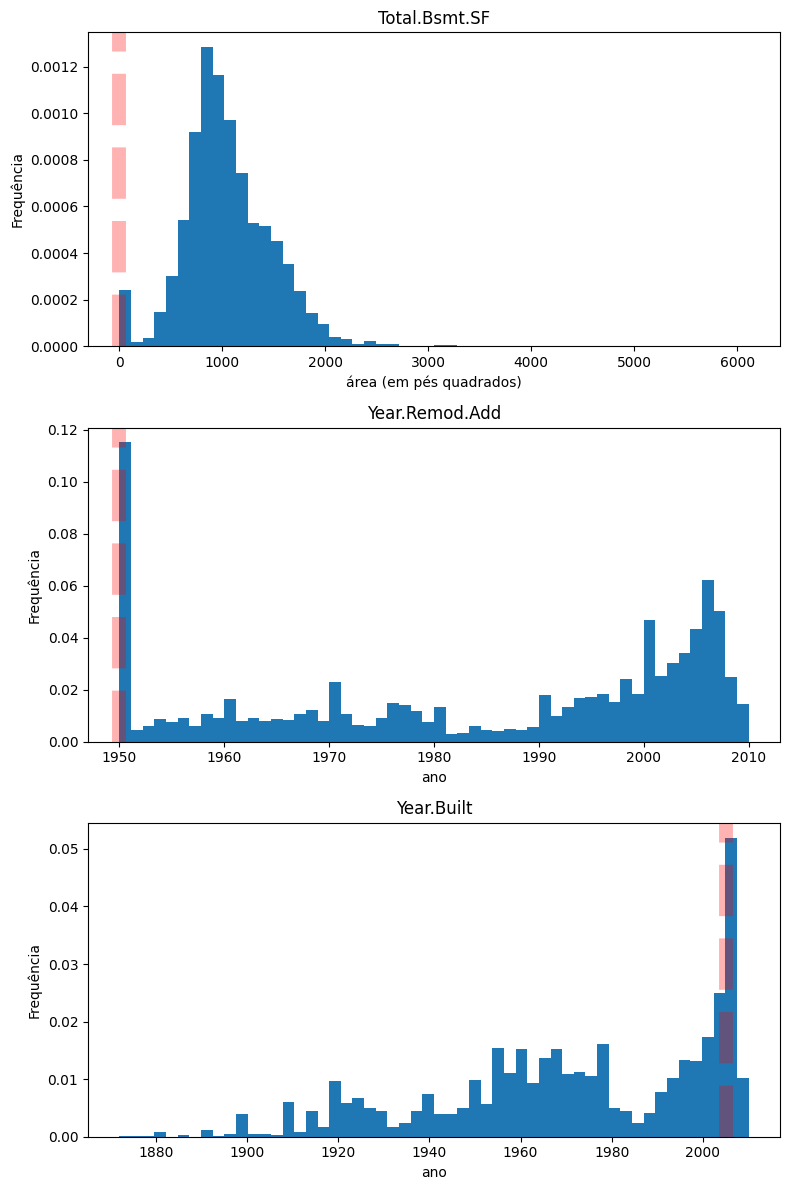

In [72]:
columns = [
    'Total.Bsmt.SF',
    'Year.Remod.Add',
    'Year.Built',
]

spike_locations = {
    'Total.Bsmt.SF': 0,
    'Year.Remod.Add': 1950,
    'Year.Built': 2005,
}

fig, axes = plt.subplots(3, 1)
fig.set_size_inches(8, 12)
for ax, column in zip(axes, columns):
    ax.hist(data[column], bins=n_bins, density=True)
    ax.axvline(
        spike_locations[column],
        color='red',
        linestyle='--',
        linewidth=10,
        alpha=0.3,
    )
    ax.set_xlabel(measurement_units[column])
    ax.set_ylabel('Frequência')
    ax.set_title(column)
fig.tight_layout()
plt.show()

Focando no histograma dessas três feautures é possível perceber que não há spikes, pois o que suspeitávamos de ser spikes não representam barras finas e proeminentes.

##### Colunas positivas com cauda à direita

As colunas `Gr.Liv.Area`, `Total.Bsmt.SF` e `SalePrice` apresentam um comportamento comum:

- São quantidades estritamente positivas;
- Possuem cauda longa à direita.

Nestes casos, pode ser interessante aplicar uma transformação do tipo "logaritmo" aos dados. Vejamos como fica:

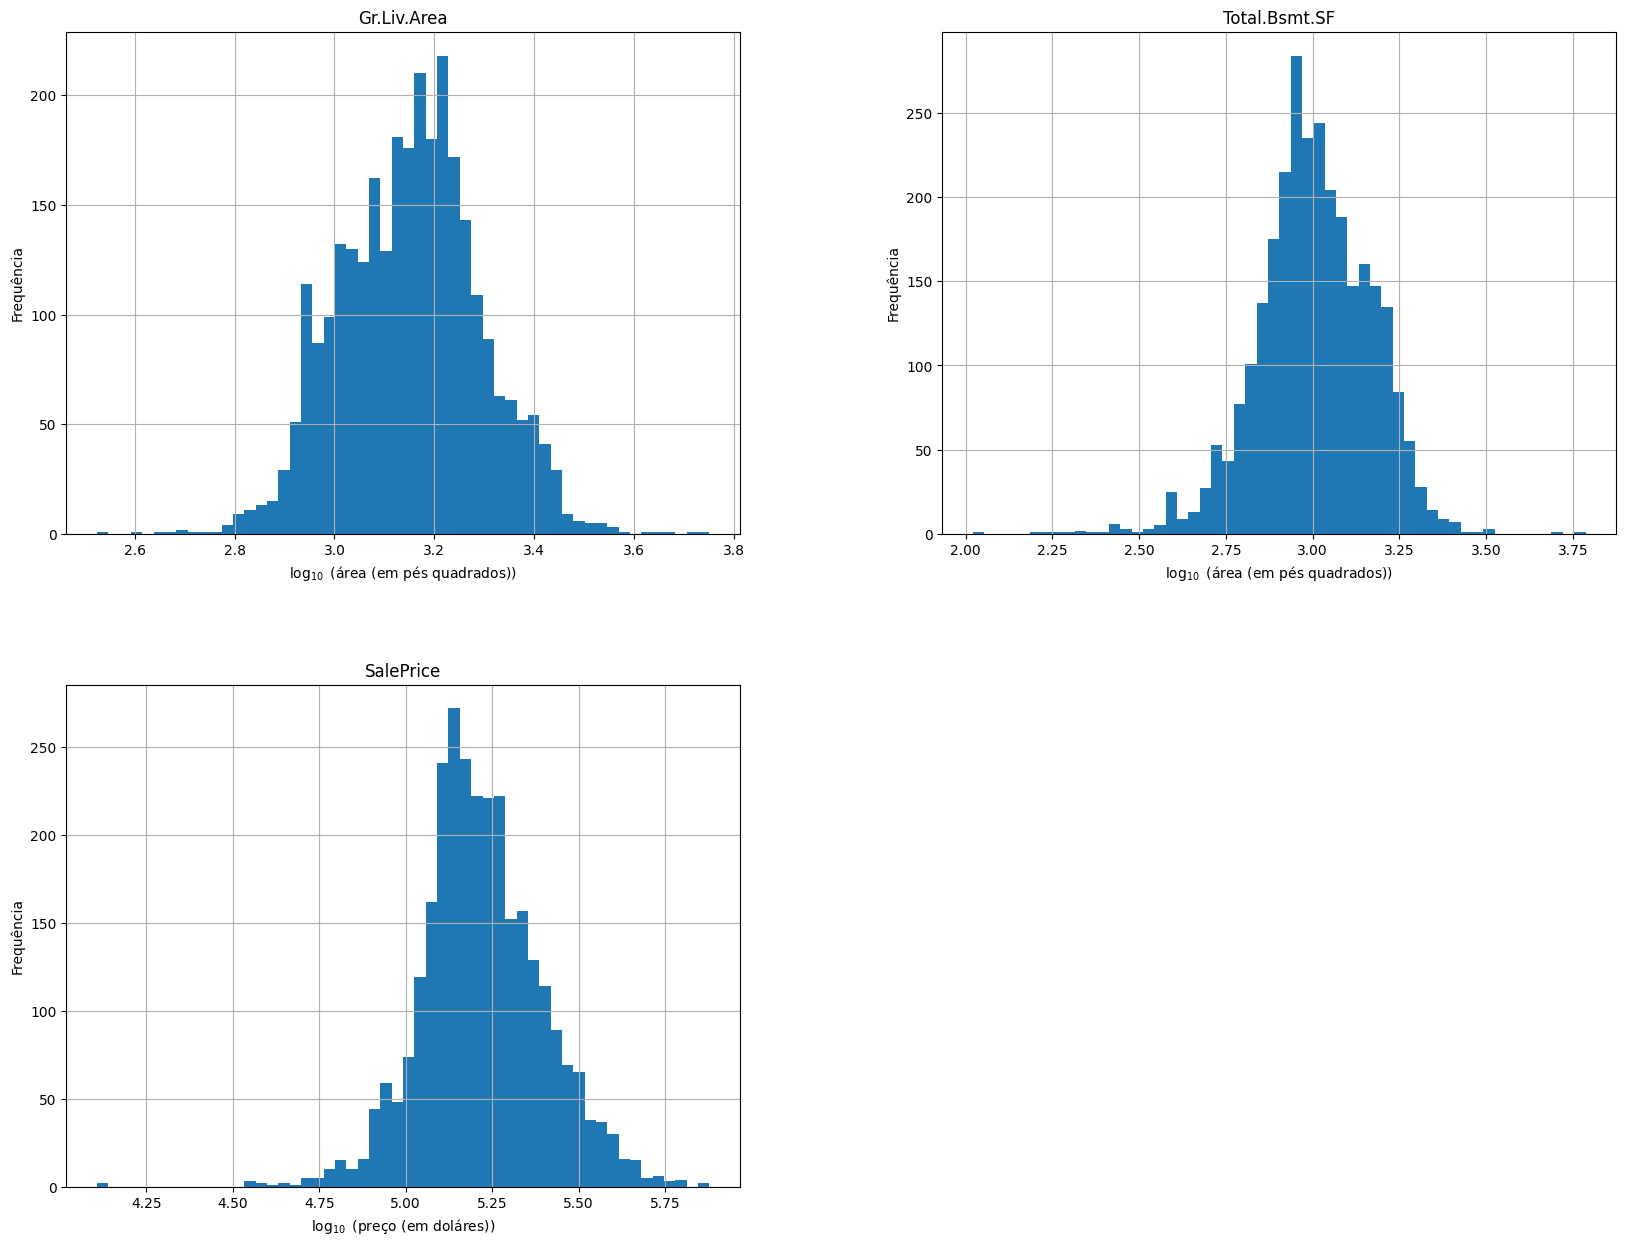

In [73]:
columns = [
    'Gr.Liv.Area',
    'Total.Bsmt.SF',
    'SalePrice',
]

data_filtered = data[columns].where(data[columns] > 0)

results = data_filtered[columns] \
    .map(np.log10) \
    .hist(bins=n_bins, figsize=(20, 15))

for subplot in results.flatten():
    column = subplot.get_title()
    if not column:
        continue
    unit = measurement_units[column]
    subplot.set_xlabel('$\\log_{10}$ ' + f'({unit})')
    subplot.set_ylabel('Frequência')

plt.show()

É interessante notar que os dados, após uma transformação logarítmica, passam a ter uma característica mais simétrica, e sem *outliers*! Isso pode ser muito benéfico para alguns tipos de modelos, em especial o *modelo linear* que veremos em breve.

Agora vamos analisar as features categóticas

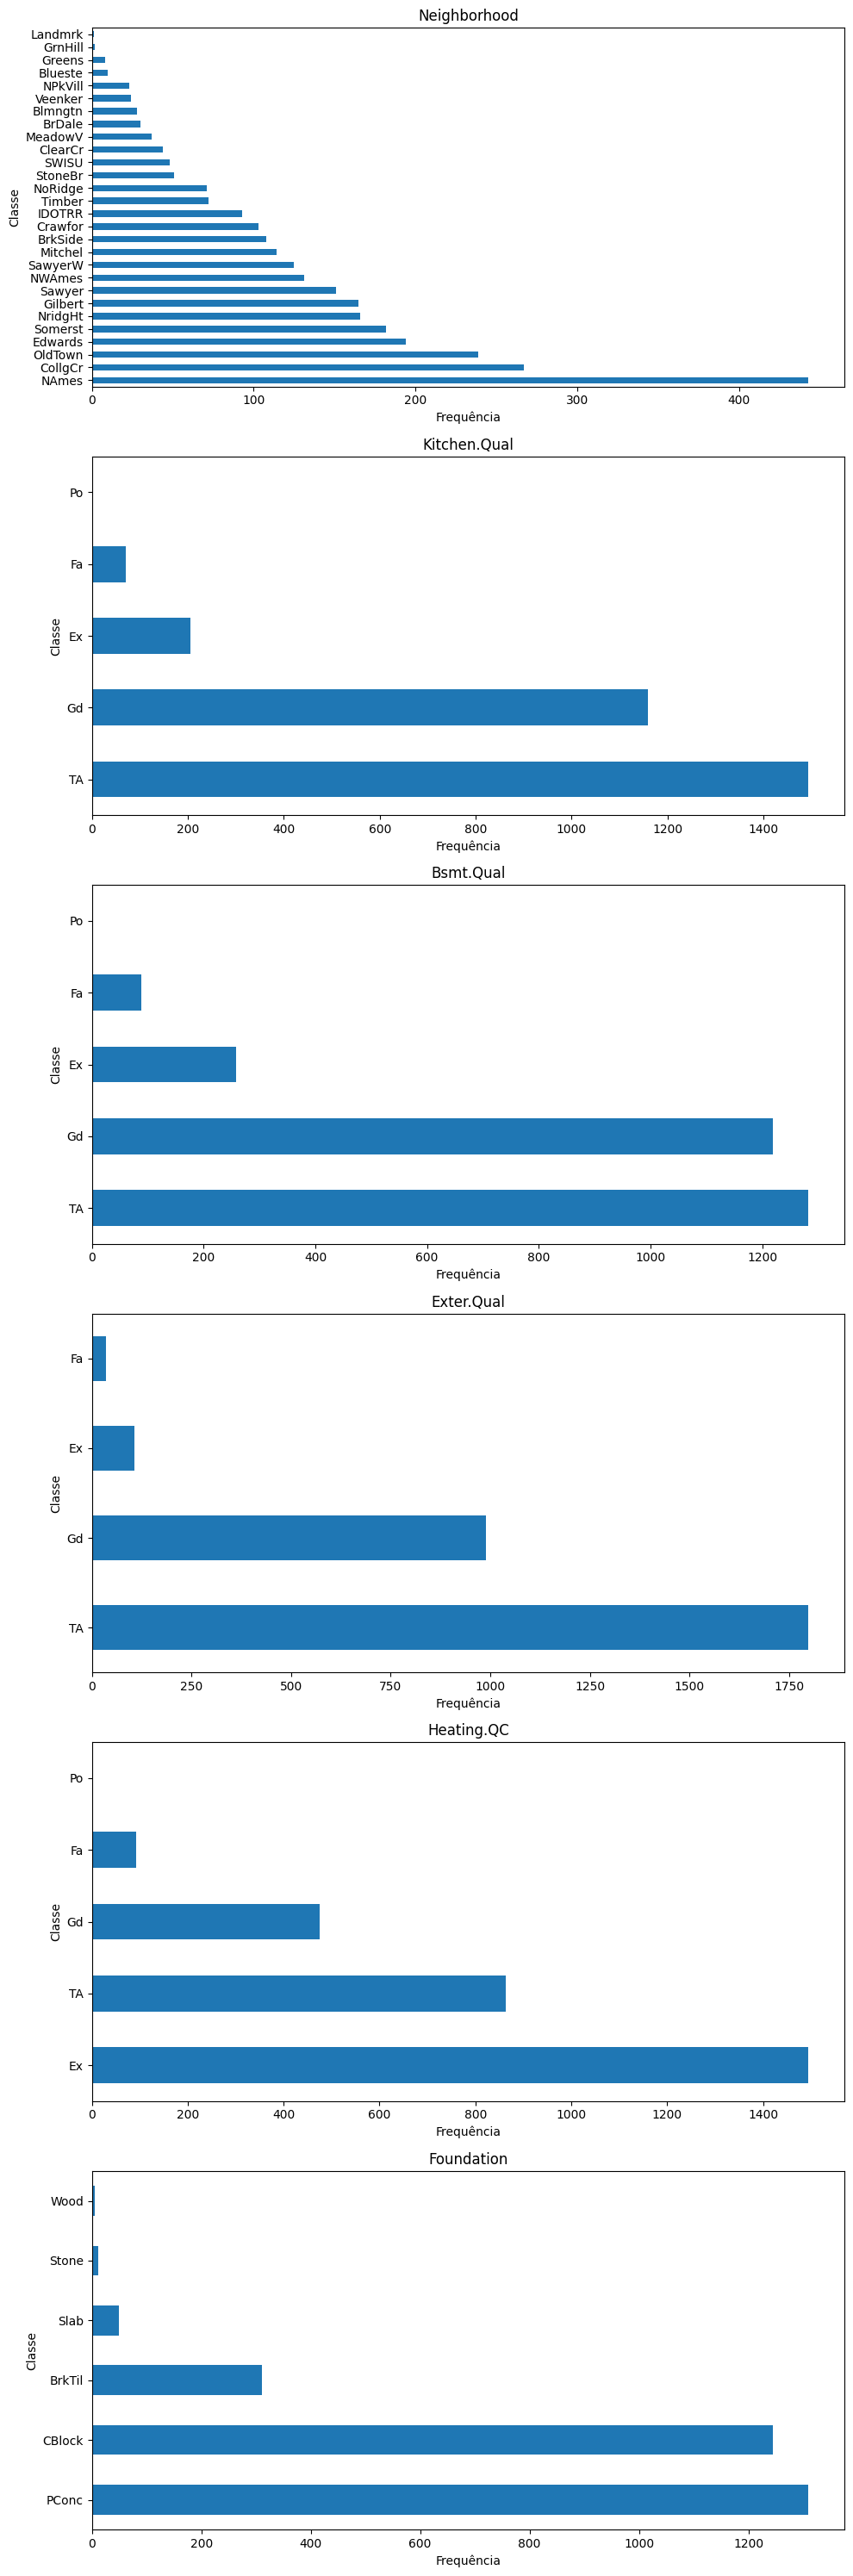

In [74]:
import matplotlib.pyplot as plt

columns = [
    "Neighborhood",
    "Kitchen.Qual",
    "Bsmt.Qual",
    "Exter.Qual",
    "Heating.QC",
    "Foundation",
]

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5 * len(columns)))

for ax, column in zip(axes, columns):
    data[column].value_counts().plot.barh(ax=ax)

    ax.set_title(column)
    ax.set_xlabel('Frequência')
    ax.set_ylabel('Classe')

    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

Observamos o seguinte:

##### Casos raros

***Neighborhood***

Casos raros presentes em Landmrk e GrnHill

***Kitchen.Qual***

Casos raros presentes em Po

***Bsmt.Qual***

Casos raros presentes em Po

***Exter.Qual***

Casos raros presentes em Po

***Heating.QC***

Casos raros presentes em Po

***Foundation***

Casos raros presentes em Wood e Stone

### Filtragem

In [75]:
import pandas as pd

def get_valid_rows(data: pd.DataFrame) -> pd.Series:
    '''Returns a boolean Series indicating which rows of a DataFrame are valid.

    Args:
        data: A pandas DataFrame.

    Returns:
        A boolean Series indicating which rows of the input DataFrame are valid.
    '''
    valid_rows = (
        (data['Overall.Qual'] > 3) & (data['Overall.Qual'] < 10) &
        (data['Garage.Cars'] > 0) & (data['Garage.Cars'] < 4) &
        (data['Full.Bath'] > 0) & (data['Full.Bath'] < 3) &
        (data['TotRms.AbvGrd'] > 3) & (data['TotRms.AbvGrd'] < 9) &
        (data['Fireplaces'] < 2)
    )

    valid_rows &= (
        (data['Neighborhood'] != "Landmrk") &
        (data['Neighborhood'] != "GrnHill") &
        (data['Kitchen.Qual'] != "Po") &
        (data['Bsmt.Qual'] != "Po") &
        (data['Exter.Qual'] != "Po") &
        (data['Heating.QC'] != "Po") &
        (data['Foundation'] != "Wood") &
        (data['Foundation'] != "Stone")
    )

    return valid_rows

def filter_data(data: pd.DataFrame) -> pd.DataFrame:
    '''Filters a DataFrame to remove invalid rows.

    Args:
        data: A pandas DataFrame.

    Returns:
        A pandas DataFrame with invalid rows removed.
    '''
    valid_rows = get_valid_rows(data)
    return data[valid_rows]

filtered_data = filter_data(data)

## Pipeline de pré-processamento

In [76]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [77]:
X = filtered_data.drop(columns=['SalePrice'])
y = np.log10(filtered_data['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [78]:
num_atts = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_atts = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [79]:

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_atts),
    ('cat', categorical_pipeline, cat_atts),
])


## Definição dos modelos e grades de hiperparâmetros

In [80]:

models = {
    'dummy': {
        'pipeline': Pipeline([('pre', preprocessor),
                              ('model', DummyRegressor(strategy='mean'))]),
        'params': {}
    },
    'linear': {
        'pipeline': Pipeline([('pre', preprocessor),
                              ('model', LinearRegression())]),
        'params': {}
    },
    'ridge': {
        'pipeline': Pipeline([('pre', preprocessor),
                              ('model', Ridge())]),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0, 100.0]
        }
    },
    'lasso': {
        'pipeline': Pipeline([('pre', preprocessor),
                              ('model', Lasso(max_iter=5000))]),
        'params': {
            'model__alpha': [0.001, 0.01, 0.1, 1.0]
        }
    },
    'poly+linear': {
        'pipeline': Pipeline([
            ('pre', preprocessor),
            ('poly', PolynomialFeatures(degree=2, include_bias=False)),
            ('model', Ridge())
        ]),
        'params': {
            'model__alpha': [1.0, 10.0]
        }
    }
}


## GridSearchCV para cada modelo e coleta de resultados

In [81]:
results = []
for name, mp in models.items():
    gs = GridSearchCV(
        mp['pipeline'],
        mp['params'],
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    gs.fit(X_train, y_train)
    best_rmse = -gs.best_score_
    results.append({
        'model': name,
        'best_params': gs.best_params_,
        'cv_rmse': best_rmse
    })
    
cv_results = pd.DataFrame(results).sort_values('cv_rmse')
cv_results


,model,best_params,cv_rmse
2,ridge,{'model__alpha': 10.0},0.054257
1,linear,{},0.054611
4,poly+linear,{'model__alpha': 10.0},0.055896
3,lasso,{'model__alpha': 0.001},0.056841
0,dummy,{},0.145272


In [82]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Seleciona o melhor modelo a partir dos resultados de CV
best_name = cv_results.iloc[0]['model']
best_pipeline = models[best_name]['pipeline'].set_params(**cv_results.iloc[0]['best_params'])

# Reajusta o pipeline no conjunto de treinamento
best_pipeline.fit(X_train, y_train)

# Gera previsões e calcula RMSE manualmente (para versões mais antigas do sklearn)
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(mse)
test_r2   = r2_score(y_test, y_pred)

print(f"Melhor modelo: {best_name}")
print(f"RMSE no teste: {test_rmse:.3f}")
print(f"R² no teste:    {test_r2:.3f}")


Melhor modelo: ridge
RMSE no teste: 0.048
R² no teste:    0.879
